# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 36kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

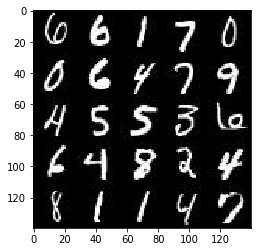

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

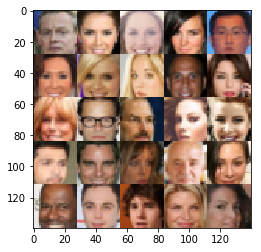

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [16]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32,(),  name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
#    return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    #reuse=False
    alpha=.2
    with tf.variable_scope('generator',reuse= not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        
        #x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        #x3 = tf.layers.batch_normalization(x3, training=is_train)
        #x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out
    
#    return None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha=.2
    g_model = generator(input_z, out_channel_dim,is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #inputs_real, inputs_z, learning_rate
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], len(data_image_mode), z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    #d_train_opt, g_train_opt
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0   
    show_every=100
    print_every=10
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                #print("111111")
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z,lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images,lr: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess=sess, n_images=30, input_z=input_z, out_channel_dim=data_shape[3], image_mode=data_image_mode)
                    #gen_samples = sess.run(
                    #               generator(input_z,  data_shape[3],  is_train=False),
                    #               feed_dict={input_z: sample_z})
                    #samples.append(gen_samples)
                    #_ = view_samples(-1, samples, 6, 12, figsize=figsize)
                    #plt.show()
                
                #saver.save(sess, './checkpoints/generator.ckpt')

  #  with open('samples.pkl', 'wb') as f:
  #      pkl.dump(samples, f)
    
    return losses, samples
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.1533... Generator Loss: 2.7101
Epoch 1/2... Discriminator Loss: 1.8810... Generator Loss: 2.0225
Epoch 1/2... Discriminator Loss: 1.5576... Generator Loss: 3.6783
Epoch 1/2... Discriminator Loss: 0.4310... Generator Loss: 1.4058
Epoch 1/2... Discriminator Loss: 1.2082... Generator Loss: 2.0038
Epoch 1/2... Discriminator Loss: 0.9096... Generator Loss: 1.2936
Epoch 1/2... Discriminator Loss: 1.1846... Generator Loss: 0.5180
Epoch 1/2... Discriminator Loss: 1.2105... Generator Loss: 0.4784
Epoch 1/2... Discriminator Loss: 0.9619... Generator Loss: 0.6939
Epoch 1/2... Discriminator Loss: 0.9457... Generator Loss: 2.7075


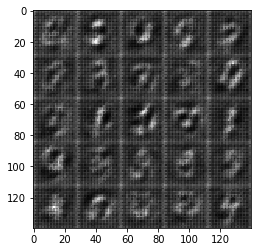

Epoch 1/2... Discriminator Loss: 1.0752... Generator Loss: 3.5433
Epoch 1/2... Discriminator Loss: 0.3761... Generator Loss: 2.0338
Epoch 1/2... Discriminator Loss: 1.5264... Generator Loss: 5.2985
Epoch 1/2... Discriminator Loss: 0.2367... Generator Loss: 2.1388
Epoch 1/2... Discriminator Loss: 0.2423... Generator Loss: 1.9197
Epoch 1/2... Discriminator Loss: 0.0897... Generator Loss: 3.1233
Epoch 1/2... Discriminator Loss: 0.0563... Generator Loss: 3.3583
Epoch 1/2... Discriminator Loss: 1.3315... Generator Loss: 6.4280
Epoch 1/2... Discriminator Loss: 0.2850... Generator Loss: 5.3688
Epoch 1/2... Discriminator Loss: 1.7571... Generator Loss: 6.6762


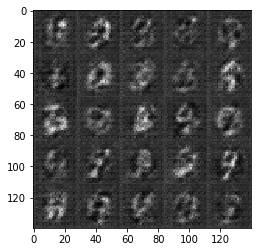

Epoch 1/2... Discriminator Loss: 0.1308... Generator Loss: 2.7754
Epoch 1/2... Discriminator Loss: 0.1311... Generator Loss: 3.8467
Epoch 1/2... Discriminator Loss: 0.2129... Generator Loss: 2.5312
Epoch 1/2... Discriminator Loss: 0.4945... Generator Loss: 4.6486
Epoch 1/2... Discriminator Loss: 1.4499... Generator Loss: 0.3591
Epoch 1/2... Discriminator Loss: 0.4394... Generator Loss: 1.6586
Epoch 1/2... Discriminator Loss: 0.2117... Generator Loss: 2.1377
Epoch 1/2... Discriminator Loss: 1.2040... Generator Loss: 0.4432
Epoch 1/2... Discriminator Loss: 0.3833... Generator Loss: 2.0779
Epoch 1/2... Discriminator Loss: 0.2594... Generator Loss: 2.5310


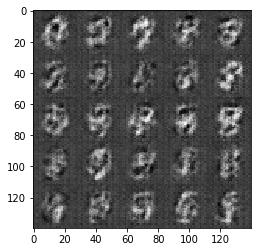

Epoch 1/2... Discriminator Loss: 0.1607... Generator Loss: 2.4201
Epoch 1/2... Discriminator Loss: 0.1061... Generator Loss: 3.0798
Epoch 1/2... Discriminator Loss: 2.3387... Generator Loss: 10.9106
Epoch 1/2... Discriminator Loss: 0.3339... Generator Loss: 1.8794
Epoch 1/2... Discriminator Loss: 0.2226... Generator Loss: 2.1108
Epoch 1/2... Discriminator Loss: 0.1478... Generator Loss: 2.6041
Epoch 1/2... Discriminator Loss: 0.1433... Generator Loss: 4.7752
Epoch 1/2... Discriminator Loss: 0.0965... Generator Loss: 4.0260
Epoch 1/2... Discriminator Loss: 0.0829... Generator Loss: 3.9406
Epoch 1/2... Discriminator Loss: 0.0600... Generator Loss: 3.8921


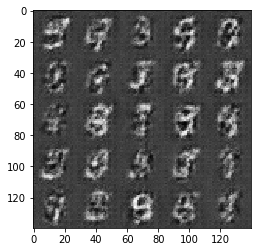

Epoch 1/2... Discriminator Loss: 1.2602... Generator Loss: 0.4069
Epoch 1/2... Discriminator Loss: 0.4134... Generator Loss: 1.6477
Epoch 1/2... Discriminator Loss: 0.3185... Generator Loss: 2.1868
Epoch 1/2... Discriminator Loss: 0.1651... Generator Loss: 2.7888
Epoch 1/2... Discriminator Loss: 0.1635... Generator Loss: 2.7017
Epoch 1/2... Discriminator Loss: 0.1313... Generator Loss: 3.0269
Epoch 2/2... Discriminator Loss: 0.1414... Generator Loss: 2.5579
Epoch 2/2... Discriminator Loss: 0.1522... Generator Loss: 2.5908
Epoch 2/2... Discriminator Loss: 0.2581... Generator Loss: 1.9167
Epoch 2/2... Discriminator Loss: 0.4473... Generator Loss: 4.1479


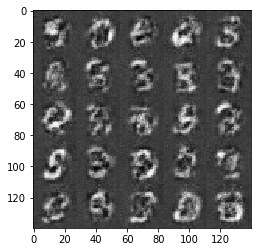

Epoch 2/2... Discriminator Loss: 0.3140... Generator Loss: 1.7437
Epoch 2/2... Discriminator Loss: 0.1869... Generator Loss: 2.3648
Epoch 2/2... Discriminator Loss: 0.1972... Generator Loss: 2.1702
Epoch 2/2... Discriminator Loss: 1.8122... Generator Loss: 0.2223
Epoch 2/2... Discriminator Loss: 0.2686... Generator Loss: 2.2717
Epoch 2/2... Discriminator Loss: 0.2638... Generator Loss: 2.2718
Epoch 2/2... Discriminator Loss: 0.2362... Generator Loss: 2.2533
Epoch 2/2... Discriminator Loss: 0.1256... Generator Loss: 2.9481
Epoch 2/2... Discriminator Loss: 0.1209... Generator Loss: 2.7798
Epoch 2/2... Discriminator Loss: 0.0947... Generator Loss: 3.1874


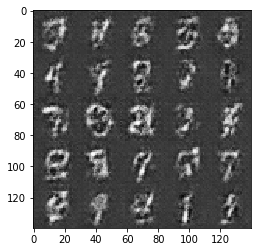

Epoch 2/2... Discriminator Loss: 0.0952... Generator Loss: 3.4649
Epoch 2/2... Discriminator Loss: 0.0680... Generator Loss: 3.6283
Epoch 2/2... Discriminator Loss: 0.0693... Generator Loss: 3.7571
Epoch 2/2... Discriminator Loss: 0.0553... Generator Loss: 3.7798
Epoch 2/2... Discriminator Loss: 0.0682... Generator Loss: 3.3317
Epoch 2/2... Discriminator Loss: 0.0645... Generator Loss: 4.7667
Epoch 2/2... Discriminator Loss: 0.0340... Generator Loss: 4.5611
Epoch 2/2... Discriminator Loss: 0.3443... Generator Loss: 4.0606
Epoch 2/2... Discriminator Loss: 0.2329... Generator Loss: 2.2055
Epoch 2/2... Discriminator Loss: 0.3160... Generator Loss: 1.6996


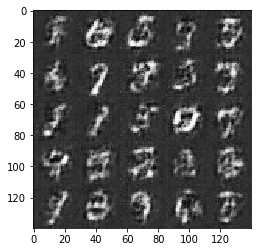

Epoch 2/2... Discriminator Loss: 0.2539... Generator Loss: 1.8995
Epoch 2/2... Discriminator Loss: 0.1525... Generator Loss: 2.6909
Epoch 2/2... Discriminator Loss: 0.1137... Generator Loss: 2.9838
Epoch 2/2... Discriminator Loss: 0.0994... Generator Loss: 2.9785
Epoch 2/2... Discriminator Loss: 0.1153... Generator Loss: 2.7992
Epoch 2/2... Discriminator Loss: 0.0655... Generator Loss: 3.5797
Epoch 2/2... Discriminator Loss: 0.0728... Generator Loss: 3.2091
Epoch 2/2... Discriminator Loss: 0.0693... Generator Loss: 3.5908
Epoch 2/2... Discriminator Loss: 0.0592... Generator Loss: 3.5752
Epoch 2/2... Discriminator Loss: 0.0863... Generator Loss: 2.9410


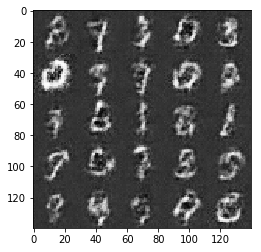

Epoch 2/2... Discriminator Loss: 0.1018... Generator Loss: 2.6889
Epoch 2/2... Discriminator Loss: 0.0669... Generator Loss: 3.3442
Epoch 2/2... Discriminator Loss: 0.1815... Generator Loss: 2.0873
Epoch 2/2... Discriminator Loss: 1.6278... Generator Loss: 6.6836
Epoch 2/2... Discriminator Loss: 0.1971... Generator Loss: 2.3492
Epoch 2/2... Discriminator Loss: 0.1230... Generator Loss: 2.8278
Epoch 2/2... Discriminator Loss: 0.0945... Generator Loss: 3.2750
Epoch 2/2... Discriminator Loss: 0.1031... Generator Loss: 2.9829
Epoch 2/2... Discriminator Loss: 0.0515... Generator Loss: 3.8479
Epoch 2/2... Discriminator Loss: 0.0662... Generator Loss: 3.6624


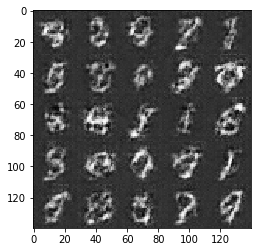

Epoch 2/2... Discriminator Loss: 0.0402... Generator Loss: 4.0976
Epoch 2/2... Discriminator Loss: 0.0599... Generator Loss: 3.4856
Epoch 2/2... Discriminator Loss: 0.0530... Generator Loss: 3.5907


In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5
print_every=100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 0.7195
Epoch 1/1... Discriminator Loss: 0.3765... Generator Loss: 2.0756
Epoch 1/1... Discriminator Loss: 0.3774... Generator Loss: 1.8513
Epoch 1/1... Discriminator Loss: 0.8446... Generator Loss: 5.0142
Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 2.3337
Epoch 1/1... Discriminator Loss: 1.1126... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 0.6451... Generator Loss: 1.3056
Epoch 1/1... Discriminator Loss: 0.8609... Generator Loss: 0.7734
Epoch 1/1... Discriminator Loss: 0.4852... Generator Loss: 1.3135
Epoch 1/1... Discriminator Loss: 0.2484... Generator Loss: 3.2475


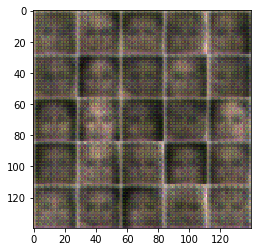

Epoch 1/1... Discriminator Loss: 0.3212... Generator Loss: 1.6678
Epoch 1/1... Discriminator Loss: 0.0350... Generator Loss: 5.8131
Epoch 1/1... Discriminator Loss: 1.2268... Generator Loss: 0.9272
Epoch 1/1... Discriminator Loss: 1.6496... Generator Loss: 0.7135
Epoch 1/1... Discriminator Loss: 0.0942... Generator Loss: 5.9140
Epoch 1/1... Discriminator Loss: 0.0932... Generator Loss: 3.3087
Epoch 1/1... Discriminator Loss: 0.0415... Generator Loss: 3.7970
Epoch 1/1... Discriminator Loss: 0.1125... Generator Loss: 2.8563
Epoch 1/1... Discriminator Loss: 1.1916... Generator Loss: 0.4626
Epoch 1/1... Discriminator Loss: 0.6877... Generator Loss: 3.2009


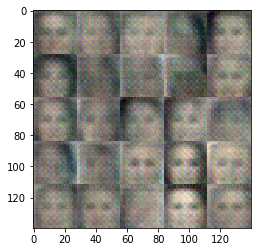

Epoch 1/1... Discriminator Loss: 0.7144... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 0.0912... Generator Loss: 3.3580
Epoch 1/1... Discriminator Loss: 0.0236... Generator Loss: 10.5887
Epoch 1/1... Discriminator Loss: 0.0605... Generator Loss: 14.4957
Epoch 1/1... Discriminator Loss: 0.2599... Generator Loss: 1.9128
Epoch 1/1... Discriminator Loss: 0.0170... Generator Loss: 5.3965
Epoch 1/1... Discriminator Loss: 0.1566... Generator Loss: 11.7754
Epoch 1/1... Discriminator Loss: 0.8250... Generator Loss: 0.7761
Epoch 1/1... Discriminator Loss: 0.0550... Generator Loss: 6.7636
Epoch 1/1... Discriminator Loss: 0.4799... Generator Loss: 1.3070


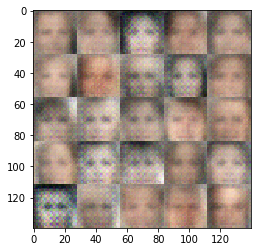

Epoch 1/1... Discriminator Loss: 0.2321... Generator Loss: 5.7342
Epoch 1/1... Discriminator Loss: 0.0370... Generator Loss: 5.2571
Epoch 1/1... Discriminator Loss: 0.3179... Generator Loss: 2.3530
Epoch 1/1... Discriminator Loss: 2.2818... Generator Loss: 0.1254
Epoch 1/1... Discriminator Loss: 0.0569... Generator Loss: 6.6389
Epoch 1/1... Discriminator Loss: 0.0132... Generator Loss: 10.2080
Epoch 1/1... Discriminator Loss: 0.0219... Generator Loss: 7.8216
Epoch 1/1... Discriminator Loss: 0.1968... Generator Loss: 7.4737
Epoch 1/1... Discriminator Loss: 0.1763... Generator Loss: 2.1038
Epoch 1/1... Discriminator Loss: 0.0167... Generator Loss: 11.6262


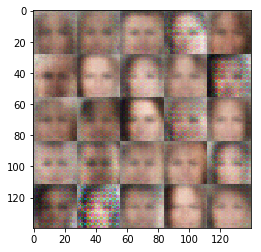

Epoch 1/1... Discriminator Loss: 0.1640... Generator Loss: 3.9977
Epoch 1/1... Discriminator Loss: 0.0112... Generator Loss: 7.1436
Epoch 1/1... Discriminator Loss: 0.0349... Generator Loss: 6.1381
Epoch 1/1... Discriminator Loss: 0.0404... Generator Loss: 4.1436
Epoch 1/1... Discriminator Loss: 0.0077... Generator Loss: 6.5079
Epoch 1/1... Discriminator Loss: 0.1193... Generator Loss: 3.2830
Epoch 1/1... Discriminator Loss: 0.0133... Generator Loss: 6.1086
Epoch 1/1... Discriminator Loss: 0.1258... Generator Loss: 2.5570
Epoch 1/1... Discriminator Loss: 0.8852... Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 0.5098... Generator Loss: 9.8193


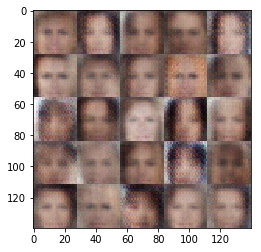

Epoch 1/1... Discriminator Loss: 0.0142... Generator Loss: 12.2783
Epoch 1/1... Discriminator Loss: 0.0546... Generator Loss: 9.3561
Epoch 1/1... Discriminator Loss: 3.0698... Generator Loss: 0.0981
Epoch 1/1... Discriminator Loss: 0.4762... Generator Loss: 3.7419
Epoch 1/1... Discriminator Loss: 0.0227... Generator Loss: 8.0283
Epoch 1/1... Discriminator Loss: 0.0402... Generator Loss: 7.2229
Epoch 1/1... Discriminator Loss: 0.9293... Generator Loss: 11.3203
Epoch 1/1... Discriminator Loss: 0.0556... Generator Loss: 6.9997
Epoch 1/1... Discriminator Loss: 0.0058... Generator Loss: 10.4441
Epoch 1/1... Discriminator Loss: 0.1479... Generator Loss: 2.3067


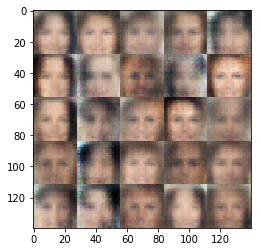

Epoch 1/1... Discriminator Loss: 1.1696... Generator Loss: 0.5409
Epoch 1/1... Discriminator Loss: 0.4964... Generator Loss: 1.0755
Epoch 1/1... Discriminator Loss: 0.2384... Generator Loss: 1.7635
Epoch 1/1... Discriminator Loss: 0.3290... Generator Loss: 7.4721
Epoch 1/1... Discriminator Loss: 0.0545... Generator Loss: 3.7039
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 7.6949
Epoch 1/1... Discriminator Loss: 0.0133... Generator Loss: 6.8855
Epoch 1/1... Discriminator Loss: 0.0096... Generator Loss: 5.9447
Epoch 1/1... Discriminator Loss: 0.0223... Generator Loss: 5.9221
Epoch 1/1... Discriminator Loss: 0.2180... Generator Loss: 2.1463


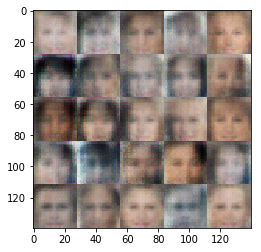

Epoch 1/1... Discriminator Loss: 0.1752... Generator Loss: 14.5873
Epoch 1/1... Discriminator Loss: 0.0172... Generator Loss: 6.9630
Epoch 1/1... Discriminator Loss: 0.2695... Generator Loss: 1.7757
Epoch 1/1... Discriminator Loss: 0.0084... Generator Loss: 6.1378
Epoch 1/1... Discriminator Loss: 0.0247... Generator Loss: 4.3236
Epoch 1/1... Discriminator Loss: 0.0085... Generator Loss: 11.3985
Epoch 1/1... Discriminator Loss: 0.0114... Generator Loss: 7.3129
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 7.1529
Epoch 1/1... Discriminator Loss: 0.0111... Generator Loss: 6.4598
Epoch 1/1... Discriminator Loss: 0.3790... Generator Loss: 1.3549


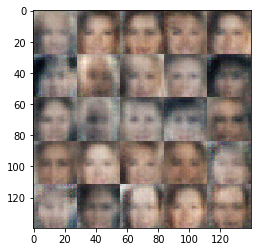

Epoch 1/1... Discriminator Loss: 0.0117... Generator Loss: 11.8447
Epoch 1/1... Discriminator Loss: 0.0061... Generator Loss: 10.1557
Epoch 1/1... Discriminator Loss: 0.0527... Generator Loss: 3.9553
Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 13.7014
Epoch 1/1... Discriminator Loss: 0.0173... Generator Loss: 6.8587
Epoch 1/1... Discriminator Loss: 0.0031... Generator Loss: 10.1600
Epoch 1/1... Discriminator Loss: 0.0065... Generator Loss: 12.9462
Epoch 1/1... Discriminator Loss: 0.0069... Generator Loss: 7.4749
Epoch 1/1... Discriminator Loss: 0.0060... Generator Loss: 7.0412
Epoch 1/1... Discriminator Loss: 0.0153... Generator Loss: 9.0435


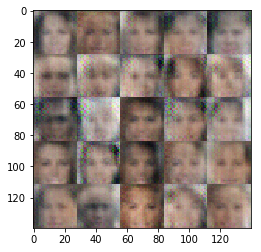

Epoch 1/1... Discriminator Loss: 0.0046... Generator Loss: 13.6649
Epoch 1/1... Discriminator Loss: 0.0101... Generator Loss: 6.7281
Epoch 1/1... Discriminator Loss: 0.0066... Generator Loss: 9.0880
Epoch 1/1... Discriminator Loss: 0.0038... Generator Loss: 10.0496
Epoch 1/1... Discriminator Loss: 0.0122... Generator Loss: 8.1732
Epoch 1/1... Discriminator Loss: 0.3636... Generator Loss: 1.5650
Epoch 1/1... Discriminator Loss: 0.0053... Generator Loss: 13.6535
Epoch 1/1... Discriminator Loss: 0.0046... Generator Loss: 9.3130
Epoch 1/1... Discriminator Loss: 0.0220... Generator Loss: 10.1717
Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 9.9177


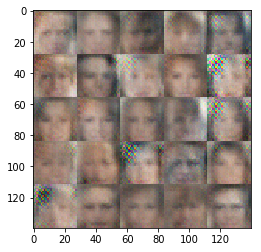

Epoch 1/1... Discriminator Loss: 0.0157... Generator Loss: 6.1668
Epoch 1/1... Discriminator Loss: 0.0085... Generator Loss: 5.9699
Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 7.9107
Epoch 1/1... Discriminator Loss: 0.8751... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 0.0146... Generator Loss: 9.1054
Epoch 1/1... Discriminator Loss: 0.0216... Generator Loss: 6.0667
Epoch 1/1... Discriminator Loss: 0.0067... Generator Loss: 9.1647
Epoch 1/1... Discriminator Loss: 0.0233... Generator Loss: 12.3140
Epoch 1/1... Discriminator Loss: 0.0062... Generator Loss: 9.2256
Epoch 1/1... Discriminator Loss: 0.0322... Generator Loss: 3.9335


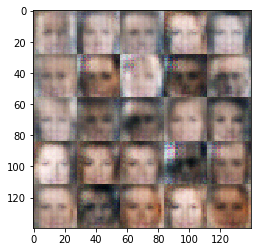

Epoch 1/1... Discriminator Loss: 0.0758... Generator Loss: 9.9790
Epoch 1/1... Discriminator Loss: 0.0092... Generator Loss: 8.3014
Epoch 1/1... Discriminator Loss: 0.3097... Generator Loss: 1.6809
Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 9.2591
Epoch 1/1... Discriminator Loss: 0.0252... Generator Loss: 7.7117
Epoch 1/1... Discriminator Loss: 0.0073... Generator Loss: 10.3115
Epoch 1/1... Discriminator Loss: 0.0074... Generator Loss: 6.1392
Epoch 1/1... Discriminator Loss: 0.0063... Generator Loss: 6.0818
Epoch 1/1... Discriminator Loss: 0.0058... Generator Loss: 8.0411
Epoch 1/1... Discriminator Loss: 0.0101... Generator Loss: 7.2050


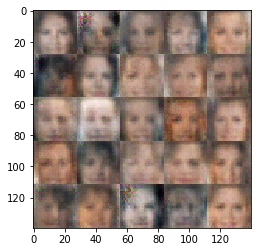

Epoch 1/1... Discriminator Loss: 0.0148... Generator Loss: 11.1898
Epoch 1/1... Discriminator Loss: 0.0067... Generator Loss: 6.9911
Epoch 1/1... Discriminator Loss: 0.0972... Generator Loss: 2.7704
Epoch 1/1... Discriminator Loss: 0.0041... Generator Loss: 8.1451
Epoch 1/1... Discriminator Loss: 0.0073... Generator Loss: 11.2690
Epoch 1/1... Discriminator Loss: 0.0632... Generator Loss: 3.3158
Epoch 1/1... Discriminator Loss: 0.0183... Generator Loss: 13.0141
Epoch 1/1... Discriminator Loss: 0.1770... Generator Loss: 2.1511
Epoch 1/1... Discriminator Loss: 0.0135... Generator Loss: 13.9901
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 11.3851


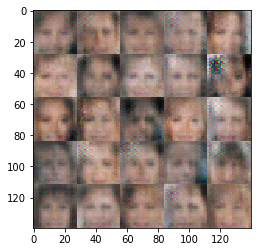

Epoch 1/1... Discriminator Loss: 0.0209... Generator Loss: 4.7215
Epoch 1/1... Discriminator Loss: 0.0041... Generator Loss: 9.8979
Epoch 1/1... Discriminator Loss: 0.0080... Generator Loss: 11.3038
Epoch 1/1... Discriminator Loss: 0.0502... Generator Loss: 3.2382
Epoch 1/1... Discriminator Loss: 0.0046... Generator Loss: 9.7053
Epoch 1/1... Discriminator Loss: 0.0040... Generator Loss: 11.8272
Epoch 1/1... Discriminator Loss: 0.0062... Generator Loss: 9.1364
Epoch 1/1... Discriminator Loss: 0.0691... Generator Loss: 3.1451
Epoch 1/1... Discriminator Loss: 0.0184... Generator Loss: 4.5436
Epoch 1/1... Discriminator Loss: 0.0062... Generator Loss: 6.0729


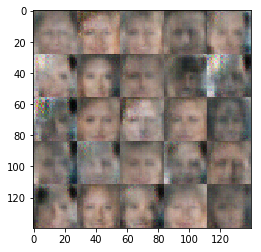

Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 7.5143
Epoch 1/1... Discriminator Loss: 0.2040... Generator Loss: 1.9860
Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 9.7317
Epoch 1/1... Discriminator Loss: 0.0076... Generator Loss: 9.2695
Epoch 1/1... Discriminator Loss: 0.0031... Generator Loss: 12.8609
Epoch 1/1... Discriminator Loss: 0.0043... Generator Loss: 13.0398
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 8.3988
Epoch 1/1... Discriminator Loss: 0.0043... Generator Loss: 14.2612
Epoch 1/1... Discriminator Loss: 0.0046... Generator Loss: 9.0145
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 9.9312


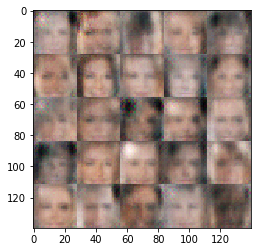

Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 8.5160
Epoch 1/1... Discriminator Loss: 0.0045... Generator Loss: 11.9791
Epoch 1/1... Discriminator Loss: 0.0289... Generator Loss: 12.5429
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 5.2101
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 8.4947
Epoch 1/1... Discriminator Loss: 0.0109... Generator Loss: 13.9002
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 7.3602
Epoch 1/1... Discriminator Loss: 0.0024... Generator Loss: 9.4527


In [15]:
batch_size = 128
z_dim = 100
learning_rate = .0002
beta1 = .5
print_every=100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.